# METHODE D'ENSEMBLE EN PARALLELE OU METHODE D'ENSEMBLE RECURSIVE c'est ca la difference entre random forest et le boosting 

In [1]:
import random as rd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
import statistics as stat
import math
from math import *
import pandas as pd

from sklearn.linear_model import LinearRegression


# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

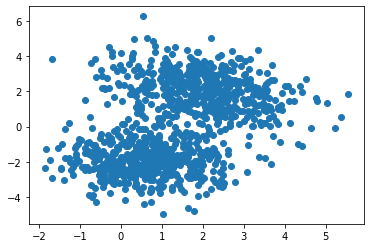

In [6]:
N=500
xgauss1=[rd.gauss(0,1) for i in range(N)]
import statistics as stat
xgauss1=[rd.gauss(0,1) for i in range(N)]
xgauss2=[rd.gauss(0,1) for i in range(N)]
mean1=[2,2]
mean2=[3/4,-2]
cov1=[[1.5,-0.5],[-0.5,1.5]]
cov2=[[1,0],[0,1]] 
group1=np.random.multivariate_normal(mean1, cov1, 500)
group2=np.random.multivariate_normal(mean2, cov2, 500)
Y1=[1 for i in range(500)]
Y2=[0 for i in range (500)]
Y=Y1+Y2
Y=np.array(Y)
X=np.concatenate((group1,group2),axis=0)
plt.scatter(X[:,0],X[:,1])

In [7]:
x1=X[:,0]
x2=X[:,1]
x1_min, x1_max=min(x1), max(x1)
x2_min, x2_max=min(x2), max(x2)
Neval=15;h1=(x1_max-x1_min)/Neval;h2=(x2_max-x2_min)/Neval
x1Eval, x2Eval=np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2))

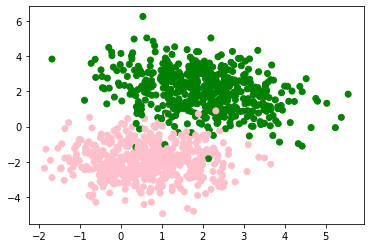

In [8]:
X1=np.c_[X,Y]
X2=X1
np.random.shuffle(X1)
color = ['pink' if y==0 else 'green' for y in X1[:,2]]
plt.scatter(X1[:,0],X1[:,1] , c=color)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4,colors=['pink','green','blue','pink'])
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [10]:
#splitting into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# random forest 

In [11]:
#Random forest 

# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
X=X_train
y=Y_train
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10,20,30,40,50,60,70,80,90,100]
max_features = ['sqrt', 'log2']
max_depths=[2,5,6,8,10]
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depths)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
   # print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.981667 using {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}


In [12]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
#tree = tree.DecisionTreeClassifier()
RF=RandomForestClassifier(max_depth=5, random_state=0,max_features= 'sqrt',n_estimators=20, oob_score=True)
RFfit=RF.fit(X_train, Y_train);
pY_test=RFfit.predict_proba(X_test);#Score and decision computation on the training set
predxclass=np.argmax(pY_test,axis=1)

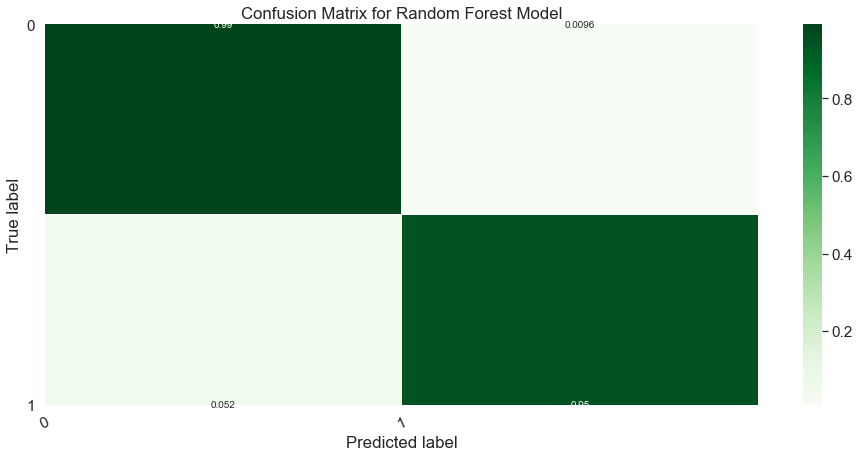

In [13]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(Y_test, predxclass)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [14]:
print(classification_report(Y_test,predxclass ))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       104
           1       0.99      0.95      0.97        96

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [15]:
score=RF.score;
OOB=RF.oob_score_
IF=RF.feature_importances_

In [16]:
score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)>

In [17]:
OOB

0.98375

The out-of-bag (OOB) error is the average error for each  𝑧𝑖

  calculated using predictions from the trees that do not contain  𝑧𝑖
  in their respective bootstrap sample. This allows the 
  RandomForestClassifier to be fit and validated whilst being trained 

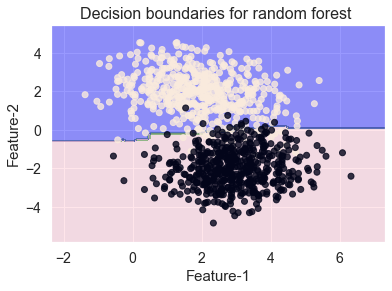

In [21]:
N=500
xgauss1=[rd.gauss(0,1) for i in range(N)]
import statistics as stat
xgauss1=[rd.gauss(0,1) for i in range(N)]
xgauss2=[rd.gauss(0,1) for i in range(N)]
mean1=[2,2]
mean2=[3,-2]
cov1=[[1.5,-0.5],[-0.5,1.5]]
cov2=[[1,0],[0,1]] 
group1=np.random.multivariate_normal(mean1, cov1, 500)
group2=np.random.multivariate_normal(mean2, cov2, 500)
Y1=[1 for i in range(500)]
Y2=[0 for i in range (500)]
Y=Y1+Y2
Y=np.array(Y)
X=np.concatenate((group1,group2),axis=0)
plt.figure()
plt.title("Decision boundaries for random forest ",fontsize=16)
plot_decision_boundaries(X,Y,RandomForestClassifier,max_depth=5, random_state=0,max_features= 'sqrt',n_estimators=20)
plt.show()

# ADABOOST

In [23]:
##Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
Ab=AdaBoostClassifier(n_estimators=100, random_state=0)
Abfit=Ab.fit(X_train, Y_train)
y_pred=Abfit.predict(X_test);
E_all=(Y_test!=y_pred).sum()/len(y)
print("Boost Error on the complete training set %5.2f->",E_all)

Boost Error on the complete training set %5.2f-> 0.00875


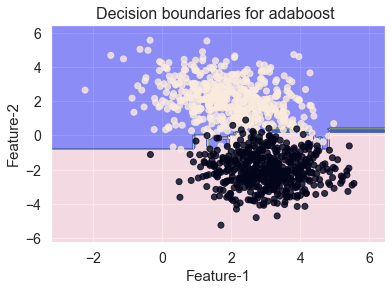

In [24]:
N=500
xgauss1=[rd.gauss(0,1) for i in range(N)]
import statistics as stat
xgauss1=[rd.gauss(0,1) for i in range(N)]
xgauss2=[rd.gauss(0,1) for i in range(N)]
mean1=[2,2]
mean2=[3,-2]
cov1=[[1.5,-0.5],[-0.5,1.5]]
cov2=[[1,0],[0,1]] 
group1=np.random.multivariate_normal(mean1, cov1, 500)
group2=np.random.multivariate_normal(mean2, cov2, 500)
Y1=[1 for i in range(500)]
Y2=[0 for i in range (500)]
Y=Y1+Y2
Y=np.array(Y)
X=np.concatenate((group1,group2),axis=0)
plt.figure()
plt.title("Decision boundaries for adaboost ",fontsize=16)
plot_decision_boundaries(X,Y,AdaBoostClassifier,n_estimators=100, random_state=0)
plt.show()

# Structure of the successive Adaboost trees

In [26]:
import matplotlib.pyplot as plt
Ad=AdaBoostClassifier(n_estimators=200, random_state=0)
Adfit=Ad.fit(X_train, Y_train)
ad_train_predict=Ad.staged_predict(X_train)
Ad_seq_errors=[]
for Ad_train_predict in Ad.staged_predict(X_train):
    Ad_seq_errors.append(metrics.accuracy_score(Ad_train_predict, y))
    
plt.figure(figsize=(15, 5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

Text(0.5, 0, 'Number of Trees')

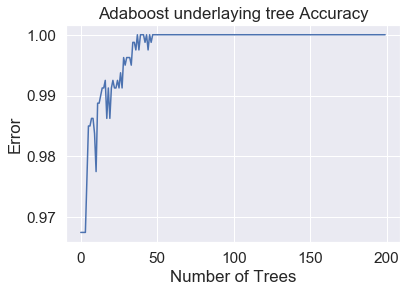

In [27]:
plt.plot(Ad_seq_errors);
plt.title('Adaboost underlaying tree Accuracy')
plt.ylabel('Error');
plt.xlabel('Number of Trees')